<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Viral_low_100000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

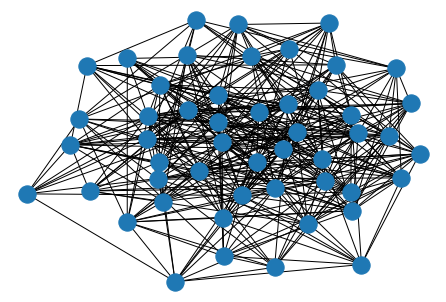

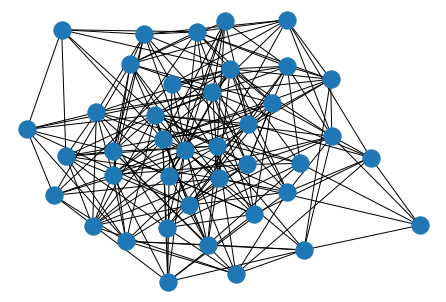

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3 #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [1 1 0 ... 0 0 0]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=(1/(Node[cur][2]['I'] + Node[cur][1]['S'] + 1))
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=(1/(Node[cur][2]['I'] + Node[cur][1]['S'] + 1))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            Node_next[nex][0]['Viral_load']+=1
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=2
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28617, 28617, 28617, 28617, 28617, 28617, 28617]
[2000, 5633, 15462, 33799, 53036, 62670, 65159, 63827, 60739, 51502, 33752, 15155, 6046, 4044, 3852, 3682, 3431, 3094, 2586, 2128, 1707, 1286, 967, 678, 488, 411, 389, 366, 337, 311, 285, 247, 194, 150, 107, 81, 51, 25, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5633, 15462, 33799, 53036, 62670, 65159, 65827, 66372, 66964, 67551, 68191, 68716, 69203, 69679, 70054, 70395, 70645, 70777, 70844, 70910, 70965, 71021, 71073, 71133, 71188, 71233, 71276, 71302, 71332, 71358, 71380, 71382, 71383]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28

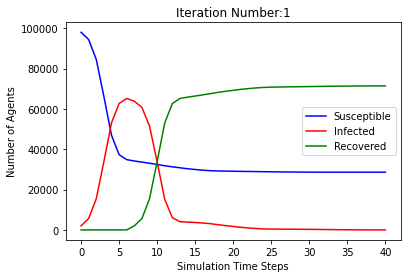

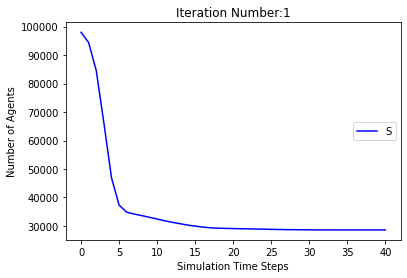

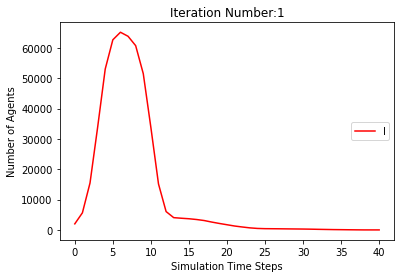

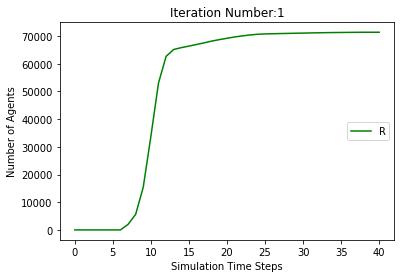

[98000, 94142, 84033, 65660, 46484, 37210, 34975, 34340, 33746, 33103, 32468, 31781, 31129, 30560, 30054, 29642, 29262, 29021, 28900, 28828, 28803, 28782, 28759, 28739, 28715, 28678, 28647, 28614, 28586, 28553, 28515, 28497, 28496, 28495, 28492, 28478, 28462, 28452, 28446, 28446, 28446, 28444, 28443, 28439, 28429, 28415, 28400, 28397, 28397, 28397, 28397, 28397, 28397, 28397, 28397]
[2000, 5858, 15967, 34340, 53516, 62790, 65025, 63660, 60396, 50930, 33192, 14703, 6081, 4415, 4286, 4104, 3841, 3447, 2881, 2301, 1757, 1272, 883, 523, 306, 222, 181, 189, 196, 206, 224, 218, 182, 152, 122, 108, 91, 63, 51, 50, 49, 48, 35, 23, 23, 31, 46, 49, 47, 46, 42, 32, 18, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5858, 15967, 34340, 53516, 62790, 65025, 65660, 66254, 66897, 67532, 68219, 68871, 69440, 69946, 70358, 70738, 70979, 71100, 71172, 71197, 71218, 71241, 71261, 71285, 71322, 71353, 71386, 71414, 71447, 71485, 71503, 71504, 71505, 71508, 71522, 71538, 71548, 71554, 71554, 71554, 71556, 71557, 71561,

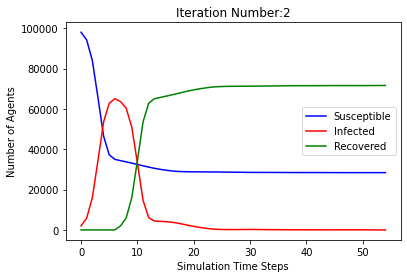

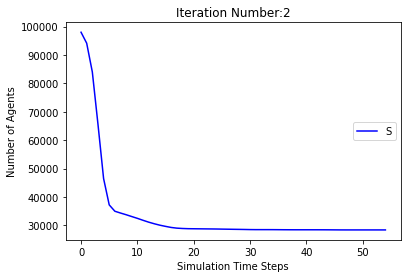

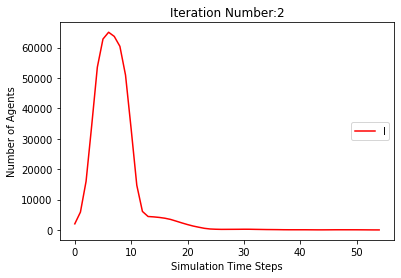

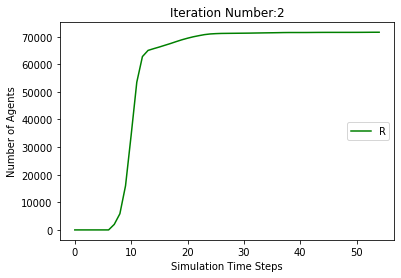

[98000, 94229, 84242, 65923, 47040, 37334, 34918, 34242, 33653, 33021, 32379, 31732, 31139, 30571, 30093, 29685, 29336, 29108, 28948, 28851, 28779, 28711, 28645, 28601, 28566, 28545, 28536, 28519, 28498, 28462, 28437, 28410, 28397, 28390, 28390, 28390, 28390, 28390, 28390, 28390, 28390]
[2000, 5771, 15758, 34077, 52960, 62666, 65082, 63758, 60576, 51221, 33544, 15308, 6195, 4347, 4149, 3968, 3685, 3271, 2784, 2288, 1792, 1382, 1040, 735, 542, 403, 315, 260, 213, 183, 164, 156, 148, 146, 129, 108, 72, 47, 20, 7, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5771, 15758, 34077, 52960, 62666, 65082, 65758, 66347, 66979, 67621, 68268, 68861, 69429, 69907, 70315, 70664, 70892, 71052, 71149, 71221, 71289, 71355, 71399, 71434, 71455, 71464, 71481, 71502, 71538, 71563, 71590, 71603, 71610]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642,

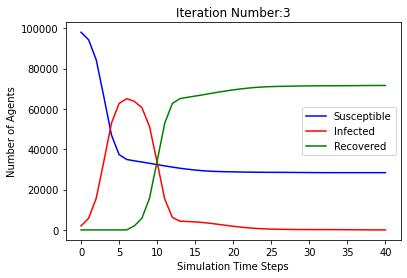

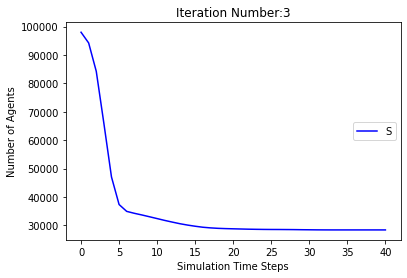

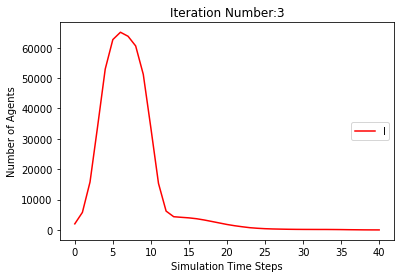

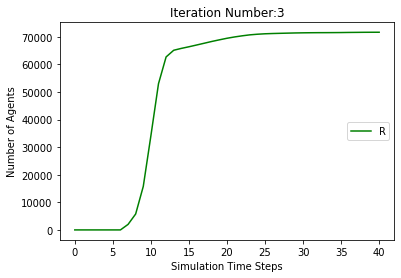

[98000, 94209, 84266, 65973, 46865, 37388, 35029, 34347, 33804, 33182, 32490, 31821, 31164, 30522, 29921, 29417, 29045, 28807, 28679, 28603, 28547, 28534, 28529, 28522, 28506, 28486, 28468, 28449, 28438, 28436, 28436, 28436, 28436, 28436, 28436, 28436, 28436]
[2000, 5791, 15734, 34027, 53135, 62612, 64971, 63653, 60405, 51084, 33483, 15044, 6224, 4507, 4426, 4387, 4137, 3683, 3142, 2561, 1975, 1387, 888, 523, 301, 193, 135, 98, 96, 93, 86, 70, 50, 32, 13, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5791, 15734, 34027, 53135, 62612, 64971, 65653, 66196, 66818, 67510, 68179, 68836, 69478, 70079, 70583, 70955, 71193, 71321, 71397, 71453, 71466, 71471, 71478, 71494, 71514, 71532, 71551, 71562, 71564]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28617, 28617, 28617, 28617, 28617, 28617, 28617], [98000, 94

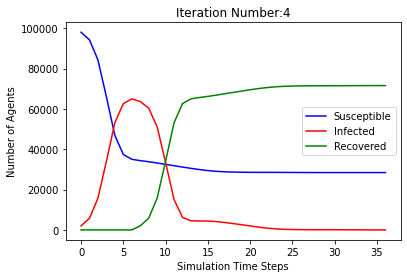

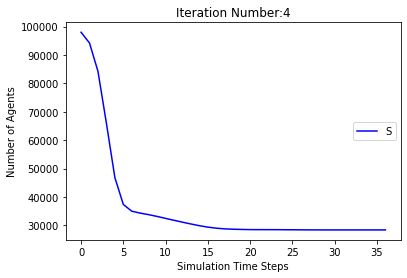

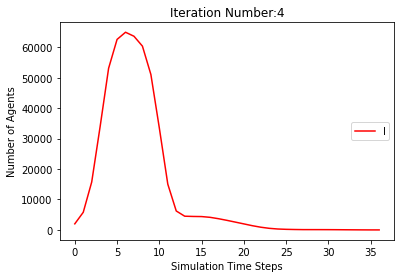

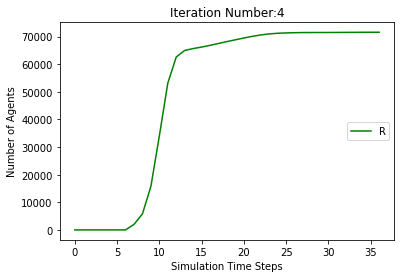

[98000, 94244, 84126, 65858, 47054, 37481, 34905, 34264, 33786, 33237, 32671, 32074, 31447, 30928, 30574, 30289, 30107, 30026, 29930, 29804, 29681, 29606, 29577, 29556, 29525, 29495, 29471, 29462, 29461, 29461, 29461, 29461, 29461, 29461, 29461, 29461]
[2000, 5756, 15874, 34142, 52946, 62519, 65095, 63736, 60458, 50889, 33187, 14980, 6034, 3977, 3690, 3497, 3130, 2645, 2144, 1643, 1247, 968, 712, 551, 501, 435, 333, 219, 145, 116, 95, 64, 34, 10, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5756, 15874, 34142, 52946, 62519, 65095, 65736, 66214, 66763, 67329, 67926, 68553, 69072, 69426, 69711, 69893, 69974, 70070, 70196, 70319, 70394, 70423, 70444, 70475, 70505, 70529, 70538, 70539]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28617, 28617, 28617, 28617, 28617, 28617, 28617], [98000, 94142, 84033, 6566

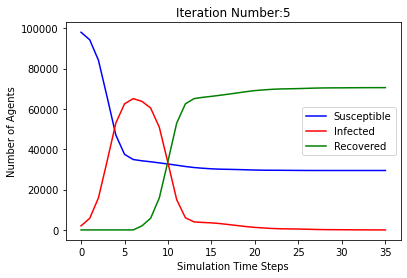

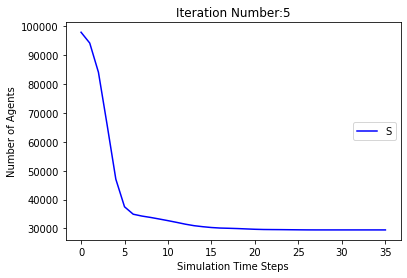

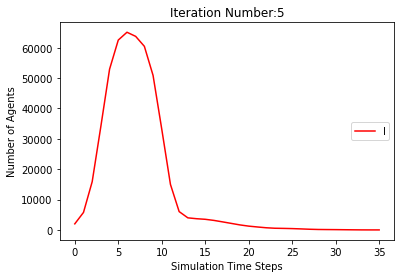

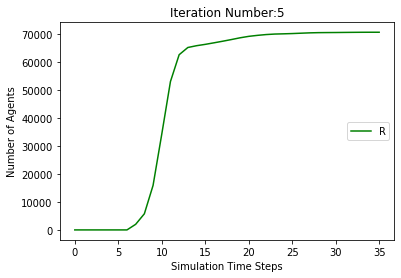

[98000, 94167, 84115, 65731, 46667, 37260, 34980, 34402, 33905, 33334, 32636, 31933, 31321, 30826, 30397, 30030, 29742, 29567, 29459, 29381, 29317, 29270, 29247, 29228, 29182, 29135, 29104, 29088, 29072, 29064, 29063, 29063, 29063, 29063, 29063, 29063, 29063, 29063]
[2000, 5833, 15885, 34269, 53333, 62740, 65020, 63598, 60262, 50781, 33095, 14734, 5939, 4154, 4005, 3875, 3592, 3069, 2474, 1940, 1509, 1127, 783, 514, 385, 324, 277, 229, 198, 183, 165, 119, 72, 41, 25, 9, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5833, 15885, 34269, 53333, 62740, 65020, 65598, 66095, 66666, 67364, 68067, 68679, 69174, 69603, 69970, 70258, 70433, 70541, 70619, 70683, 70730, 70753, 70772, 70818, 70865, 70896, 70912, 70928, 70936, 70937]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28617, 28617, 28617, 28617, 28617, 286

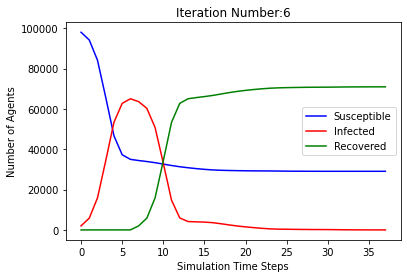

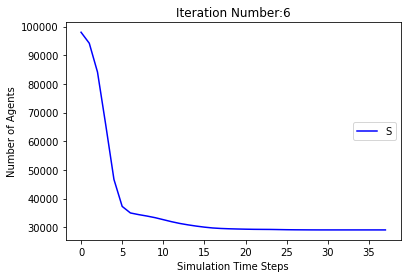

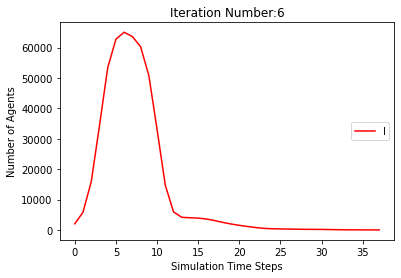

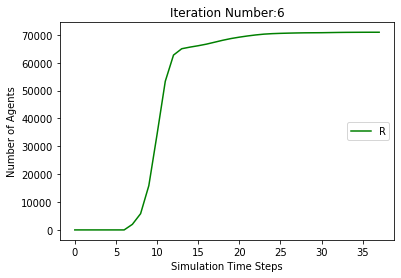

[98000, 94260, 84287, 66138, 47223, 37461, 34911, 34122, 33407, 32690, 31982, 31421, 30942, 30526, 30154, 29823, 29570, 29454, 29399, 29373, 29356, 29340, 29315, 29289, 29267, 29246, 29235, 29223, 29213, 29212, 29211, 29211, 29211, 29211, 29211, 29211, 29211, 29211]
[2000, 5740, 15713, 33862, 52777, 62539, 65089, 63878, 60853, 51597, 34156, 15802, 6519, 4385, 3968, 3584, 3120, 2528, 2022, 1569, 1170, 814, 508, 281, 187, 153, 138, 133, 127, 103, 78, 56, 35, 24, 12, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5740, 15713, 33862, 52777, 62539, 65089, 65878, 66593, 67310, 68018, 68579, 69058, 69474, 69846, 70177, 70430, 70546, 70601, 70627, 70644, 70660, 70685, 70711, 70733, 70754, 70765, 70777, 70787, 70788, 70789]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28617, 28617, 28617, 28617, 28617, 28617,

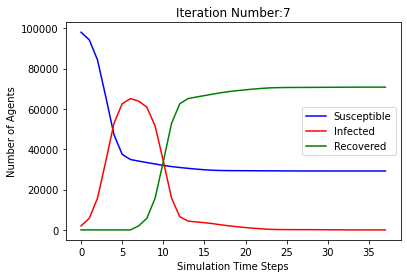

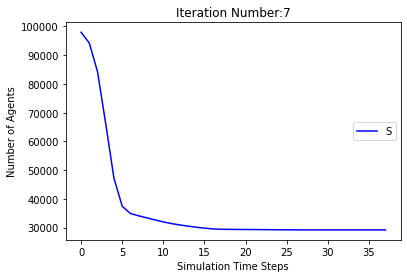

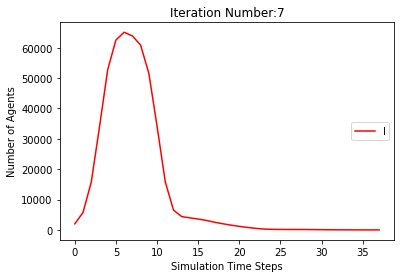

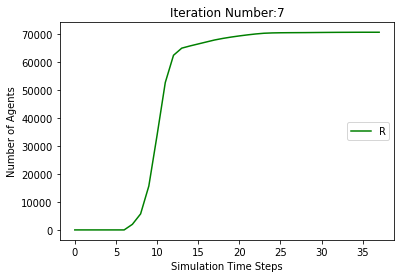

[98000, 94168, 84225, 65904, 46912, 37417, 35004, 34312, 33704, 33009, 32375, 31784, 31302, 30838, 30381, 30030, 29776, 29584, 29438, 29345, 29289, 29236, 29181, 29128, 29102, 29095, 29095, 29095, 29095, 29095, 29095, 29095, 29095]
[2000, 5832, 15775, 34096, 53088, 62583, 64996, 63688, 60464, 51216, 33529, 15128, 6115, 4166, 3931, 3674, 3233, 2791, 2346, 1957, 1549, 1145, 849, 648, 482, 343, 250, 194, 141, 86, 33, 7, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5832, 15775, 34096, 53088, 62583, 64996, 65688, 66296, 66991, 67625, 68216, 68698, 69162, 69619, 69970, 70224, 70416, 70562, 70655, 70711, 70764, 70819, 70872, 70898, 70905]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28617, 28617, 28617, 28617, 28617, 28617, 28617], [98000, 94142, 84033, 65660, 46484, 37210, 34975, 34340, 33746, 33103, 32468, 31

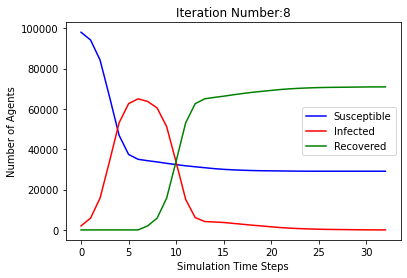

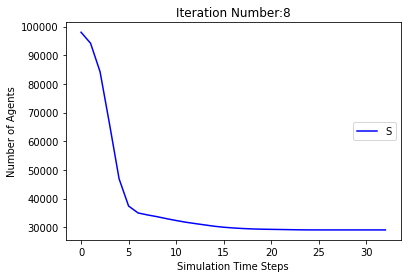

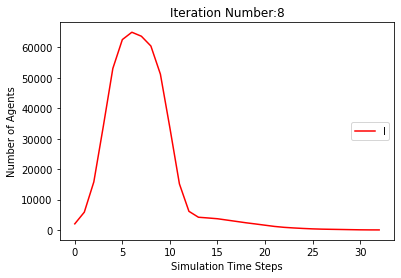

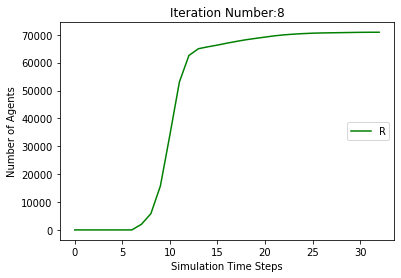

[98000, 94251, 84410, 66311, 47299, 37422, 34911, 34324, 33809, 33197, 32595, 32016, 31527, 31041, 30661, 30310, 30032, 29839, 29754, 29716, 29688, 29663, 29650, 29645, 29641, 29627, 29615, 29606, 29606, 29606, 29606, 29606, 29606, 29606, 29606]
[2000, 5749, 15590, 33689, 52701, 62578, 65089, 63676, 60442, 51213, 33716, 15283, 5895, 3870, 3663, 3499, 3165, 2756, 2262, 1811, 1353, 998, 660, 387, 198, 127, 101, 82, 57, 44, 39, 35, 21, 9, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5749, 15590, 33689, 52701, 62578, 65089, 65676, 66191, 66803, 67405, 67984, 68473, 68959, 69339, 69690, 69968, 70161, 70246, 70284, 70312, 70337, 70350, 70355, 70359, 70373, 70385, 70394]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28617, 28617, 28617, 28617, 28617, 28617, 28617], [98000, 94142, 84033, 65660, 46484, 37210, 3497

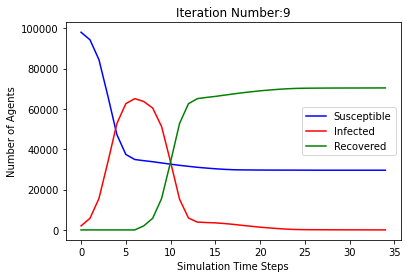

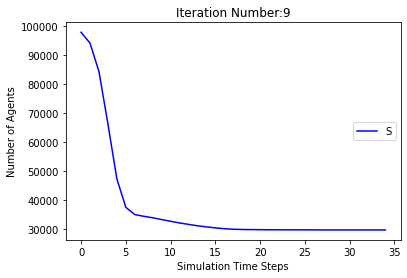

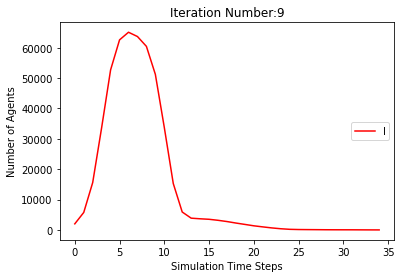

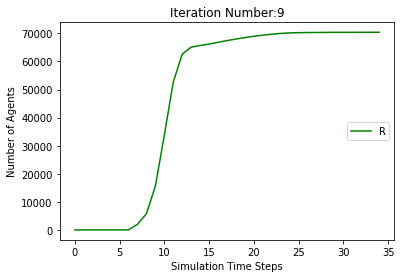

[98000, 94270, 84418, 66443, 47372, 37367, 34866, 34230, 33762, 33309, 32824, 32311, 31727, 31123, 30660, 30418, 30269, 30186, 30125, 30068, 30006, 29937, 29901, 29876, 29851, 29821, 29782, 29754, 29749, 29735, 29714, 29707, 29706, 29706, 29706, 29706, 29706, 29706, 29706, 29706]
[2000, 5730, 15582, 33557, 52628, 62633, 65134, 63770, 60508, 51109, 33619, 15061, 5640, 3743, 3570, 3344, 3040, 2638, 2186, 1659, 1117, 723, 517, 393, 335, 304, 286, 252, 188, 166, 162, 144, 115, 76, 48, 43, 29, 8, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2000, 5730, 15582, 33557, 52628, 62633, 65134, 65770, 66238, 66691, 67176, 67689, 68273, 68877, 69340, 69582, 69731, 69814, 69875, 69932, 69994, 70063, 70099, 70124, 70149, 70179, 70218, 70246, 70251, 70265, 70286, 70293, 70294]
[[], [98000, 94367, 84538, 66201, 46964, 37330, 34841, 34173, 33628, 33036, 32449, 31809, 31284, 30797, 30321, 29946, 29605, 29355, 29223, 29156, 29090, 29035, 28979, 28927, 28867, 28812, 28767, 28724, 28698, 28668, 28642, 28620, 28618, 28617, 28

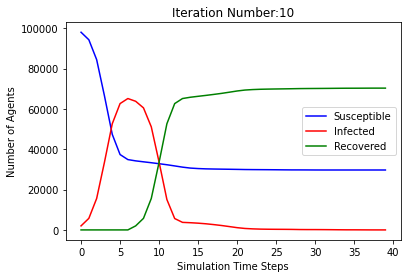

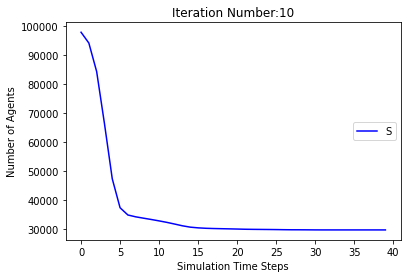

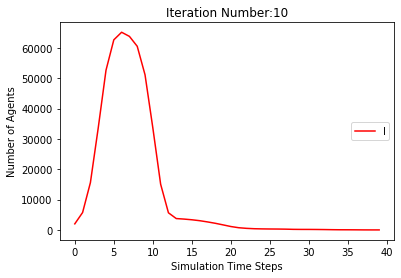

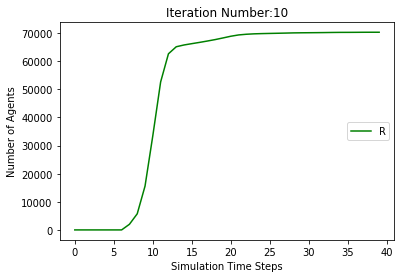

In [13]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

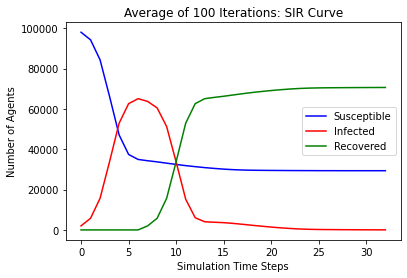

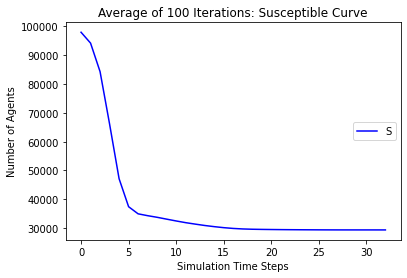

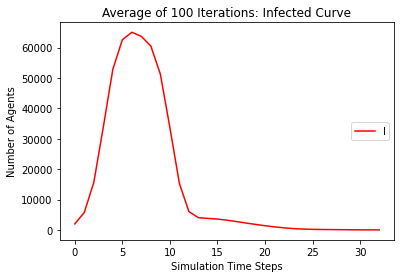

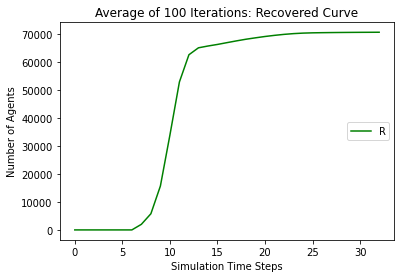

In [14]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
